In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc
rc('font',**{'family':'sans-serif', 'sans-serif':['Helvetica'], 'size': '12', 'weight':'normal'})
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.unicode_minus'] = False

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('6')
%matplotlib inline

# Hydration site analysis - without restraints

In [2]:
holo_hsa_SA = np.loadtxt("../gist/analysis/holo/hsa/SSTMap_HSA/hsa_hsa_summary.txt", skiprows=1, usecols=list(range(0,27))) # Crystal structure without ligand

0 En.U
1 En.U
2 En.U
3 En.U


<ipython-input-13-e213e392ea00>:99: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figure_Water_HSA_holo.png', figsize=(10,10), dpi=1000, bbox_inches='tight')


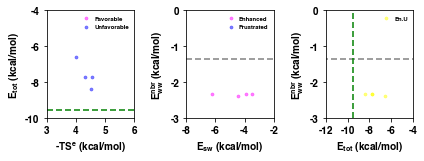

In [13]:
file_to_plot = holo_hsa_SA

ax0 = plt.subplot2grid((2,3),(0,0))

f_u_threshold = -9.53 # From bulk water
ax0.plot(np.linspace(3,7,num=101), f_u_threshold*np.ones(101),color='green', linestyle=':',dashes=[4, 2])

f_data = []
u_data = []

for i in range(len(file_to_plot)):
    if file_to_plot[i][12] < f_u_threshold:
        f_data.append(file_to_plot[i])
    if file_to_plot[i][12] > f_u_threshold:
        u_data.append(file_to_plot[i])
f_data = np.array([[100, 100]])
u_data = np.array(u_data)

ax0.scatter(-f_data.T[0], f_data.T[1], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Favorable')
ax0.scatter(-u_data.T[16], u_data.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Unfavorable')

#ax0.scatter(-file_to_plot.T[16], file_to_plot.T[12], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax0.set_xlim(3,6)
ax0.set_ylim(-10,-4)
ax0.set_xticks((3,4,5,6))
ax0.set_yticks((-10,-8,-6, -4))
ax0.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax0.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")
ax0.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax1 = plt.subplot2grid((2,3),(0,1))

en_fr_threshold = -1.36 # From bulk water
ax1.plot(np.linspace(-16,0,num=101), en_fr_threshold*np.ones(101),color='grey', linestyle=':',dashes=[4, 2])

en_data = []
fr_data = []

for i in range(len(file_to_plot)):
    if file_to_plot[i][13] < en_fr_threshold:
        en_data.append(file_to_plot[i])
    if file_to_plot[i][13] > en_fr_threshold:
        fr_data.append(file_to_plot[i])
en_data = np.array(en_data)        
fr_data = np.array([[100, 100]])

ax1.scatter(en_data.T[6], en_data.T[13], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='Enhanced')
ax1.scatter(fr_data.T[0], fr_data.T[1], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Frustrated')
#ax1.scatter(file_to_plot.T[6], file_to_plot.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax1.set_xlim(-8,-2)
ax1.set_ylim(-3,0)
ax1.set_xticks((-8,-6,-4, -2))
ax1.set_yticks((-3, -2,-1, 0))
ax1.set_xlabel(r'E$_{sw}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax1.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,2))
ax2.plot(np.linspace(-14,0,num=101), en_fr_threshold*np.ones(101), color='grey', linestyle=':',dashes=[4, 2])
ax2.plot(f_u_threshold*np.ones(101), np.linspace(-3,1,num=101), color='green', linestyle=':',dashes=[4, 2])

enF_data = []
enU_data = []
frF_data = []
frU_data = []
for i in range(len(file_to_plot)):
    if file_to_plot[i][12] < f_u_threshold and file_to_plot[i][13] < en_fr_threshold:
        print(i, 'En.F')
        enF_data.append(file_to_plot[i])
    if file_to_plot[i][12] > f_u_threshold and file_to_plot[i][13] < en_fr_threshold:
        print(i, 'En.U')
        enU_data.append(file_to_plot[i])
    if file_to_plot[i][12] < f_u_threshold and file_to_plot[i][13] > en_fr_threshold:
        print(i, 'Fr.F')
        frF_data.append(file_to_plot[i])
    if file_to_plot[i][12] > f_u_threshold and file_to_plot[i][13] > en_fr_threshold:
        print(i, 'Fr.U')
        frU_data.append(file_to_plot[i])
enF_data = np.array([100, 100])        
frF_data = np.array([100, 100])
enU_data = np.array(enU_data)        
frU_data = np.array([100, 100]) # np.array(frU_data)

# ax2.scatter(enF_data.T[0], enF_data.T[1], color='magenta', s=10, linewidths=0.5, alpha=0.5,  label='En.F')
# ax2.scatter(frF_data.T[0], frF_data.T[1], color='blue', s=10, linewidths=0.5, alpha=0.5, label='Fr.F')
ax2.scatter(enU_data.T[12], enU_data.T[13], color='yellow', s=10, linewidths=0.5, alpha=0.5, label='En.U')
# ax2.scatter(frU_data.T[0], frU_data.T[1], color='orange', s=10, linewidths=0.5, alpha=0.5, label='Fr.U')

#ax2.scatter(file_to_plot.T[12], file_to_plot.T[13], color='blue', s=10, linewidths=0.5, alpha=0.5)
ax2.set_xlim(-12,-4)
ax2.set_ylim(-3,0)
ax2.set_xticks((-12,-10,-8,-6, -4))
ax2.set_yticks((-3,-2,-1, 0))
ax2.set_xlabel(r'E$_{tot}$ (kcal/mol)', fontweight="bold")
ax2.set_ylabel("$\mathregular{E^{nbr}_{ww}}$ (kcal/mol)",   fontweight="bold")
ax2.legend(loc=1, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('Figure_Water_HSA_holo.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

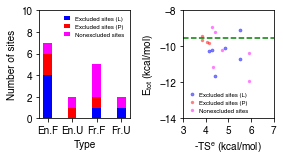

In [4]:
ax1 = plt.subplot2grid((2,3),(0,1))
ax1.set_xlim(3,7)
ax1.set_ylim(-14,-8)
ax1.set_xticks((3,4,5,6,7))
ax1.set_yticks((-14,-12,-10,-8))
ax1.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="bold")
ax1.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="bold")

excluded_idx     = [0,2,3,10,11,12]
excluded_jae_idx = [9,13,14,15] # Excluded by protein
elusive_idx    = [1,4,5,6,7,8]
excluded_data  = []
excluded_jae_data = []
elusive_data   = []

for idx in excluded_idx:
    excluded_data.append(apo_b3_hsa[idx])
for idx in excluded_jae_idx:
    excluded_jae_data.append(apo_b3_hsa[idx])
for idx in elusive_idx:
    elusive_data.append(apo_b3_hsa[idx])

ax1.scatter(-np.array(excluded_data).T[16], np.array(excluded_data).T[12], color='blue', label='Excluded sites (L)', s=10, linewidths=0.5, alpha=0.5)
ax1.scatter(-np.array(excluded_jae_data).T[16], np.array(excluded_jae_data).T[12], color='red', label='Excluded sites (P)', s=10, linewidths=0.1, alpha=0.5)
ax1.scatter(-np.array(elusive_data).T[16], np.array(elusive_data).T[12], color='magenta', label='Nonexcluded sites', s=10, linewidths=0.1, alpha=0.5)
ax1.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle='--')
ax1.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,0))
ax2.set_ylim(0,10)
ax2.set_yticks((0,2,4,6,8,10))
ax2.set_xlabel(r"Type", fontweight="bold")
ax2.set_ylabel(r"Number of sites", fontweight="bold")

labels = ['En.F', 'En.U', 'Fr.F', 'Fr.U']
excluded_L  = np.array([4, 0, 1, 1])
excluded_P  = np.array([2, 1, 1, 0])
nonexcluded = np.array([1, 1, 3, 1])
width = 0.35       # the width of the bars: can also be len(x) sequence

ax2.bar(labels, excluded_L,  width, label='Excluded sites (L)', color='blue')
ax2.bar(labels, excluded_P,  width, bottom=excluded_L, label='Excluded sites (P)', color='red')
ax2.bar(labels, nonexcluded, width, bottom=excluded_L+excluded_P, label='Nonexcluded sites', color='magenta')

ax2.legend(loc=1, ncol=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('/Users/chuankai/0-Research/4-Plant-Hormones/1-Auxin/water/analysis/Figures/\
Figure_Water_Excluded.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

<ipython-input-4-e14213ea6776>:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Figure_Water_exluded_holo.png', figsize=(10,10), dpi=1000, bbox_inches='tight')


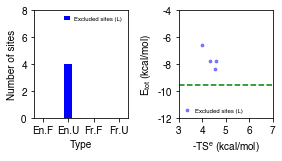

In [4]:
file_to_plot = holo_hsa_SA

ax1 = plt.subplot2grid((2,3),(0,1))
ax1.set_xlim(3,7)
ax1.set_ylim(-12,-4)
ax1.set_xticks((3,4,5,6,7))
ax1.set_yticks((-12,-10,-8,-6,-4))
ax1.set_xlabel(r'-TS$^{e}$ (kcal/mol)', fontweight="normal")
ax1.set_ylabel(r"E$_{tot}$ (kcal/mol)",   fontweight="normal")

excluded_idx     = [0,1,2,3]
excluded_jae_idx = [] 
elusive_idx    = []
excluded_data  = []
excluded_jae_data = []
elusive_data   = []

for idx in excluded_idx:
    excluded_data.append(file_to_plot[idx])
# for idx in excluded_jae_idx:
#     excluded_jae_data.append(file_to_plot[idx])
# for idx in elusive_idx:
#     elusive_data.append(apo_b3_hsa[idx])

ax1.scatter(-np.array(excluded_data).T[16], np.array(excluded_data).T[12], color='blue', label='Excluded sites (L)', s=10, linewidths=0.5, alpha=0.5)
# ax1.scatter(-np.array(excluded_jae_data).T[16], np.array(excluded_jae_data).T[12], color='red', label='Excluded sites (P)', s=10, linewidths=0.1, alpha=0.5)
# ax1.scatter(-np.array(elusive_data).T[16], np.array(elusive_data).T[12], color='magenta', label='Nonexcluded sites', s=10, linewidths=0.1, alpha=0.5)
ax1.plot(np.linspace(3,7,num=101), -9.53*np.ones(101),color='green', linestyle='--')
ax1.legend(loc=3, ncol=1, scatterpoints=1, frameon=False, handlelength = 1, prop=fontP)

ax2 = plt.subplot2grid((2,3),(0,0))
ax2.set_ylim(0,8)
ax2.set_yticks((0,2,4,6,8))
ax2.set_xlabel(r"Type", fontweight="normal")
ax2.set_ylabel(r"Number of sites", fontweight="normal")

labels = ['En.F', 'En.U', 'Fr.F', 'Fr.U']
excluded_L  = np.array([0, 4, 0, 0])
# excluded_P  = np.array([0, 0, 0, 0])
# nonexcluded = np.array([0, 0, 0, 0])
width = 0.35       # the width of the bars: can also be len(x) sequence

ax2.bar(labels, excluded_L,  width, label='Excluded sites (L)', color='blue')
# ax2.bar(labels, excluded_P,  width, bottom=excluded_L, label='Excluded sites (P)', color='red')
# ax2.bar(labels, nonexcluded, width, bottom=excluded_L, label='Nonexcluded sites', color='magenta')

ax2.legend(loc=1, ncol=1, frameon=False, handlelength = 1, prop=fontP)

plt.tight_layout()
plt.savefig('Figure_Water_exluded_holo.png', figsize=(10,10), dpi=1000, bbox_inches='tight')

In [20]:
# Enthalpy changes 
excluded_idx   = np.arange(4)
bulk_energy    = -9.53

dE, dS = 0, 0
for idx in excluded_idx:
    dE += bulk_energy - file_to_plot.T[12][idx] 
    dS += file_to_plot.T[16][idx]
print(dE, dS)

-7.727895999999998 -17.413406000000002
